In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("data.csv")
# remove columns with name ending in __MIN or __MAX
selected_cols = [
    col
    for col in data.columns
    if not col.endswith("__MIN")
    and not col.endswith("__MAX")
    and not col.endswith("_step")
]
data = data.loc[:, selected_cols]

print(f"Data columns: {data.columns}")

Data columns: Index(['step', '(adam+adam)_bs=1024_lr=0.002_sp=1.0_adam_baseline - val/loss',
       '(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv_sqrt - val/loss',
       '(muon_moonlight+adam)_bs=1024_lr=0.01_sp=1.0_adam - val/loss',
       '(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_none - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=0.25_scale_none - val/loss',
       '(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=0.0625_scale_none - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=0.0625_scale_inv_sqrt - val/loss',
       '(dion+adam)_bs=1024_lr=0.01_sp=0.0625_adam - val/loss',
       '(dion+adam)_bs=1024_lr=0.01_sp=0.25_adam - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=0.0625_scale_inv - val/loss',
       '(dion+adam)_bs=1024_lr=0.01_sp=1.0_adam - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=0.25_scale_inv - val/loss',
       '(dion+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv - val/loss',
 

In [8]:
optimizer = "muon"
sparsity = 1
scale_factors = ["scale_inv_sqrt", "scale_inv", "scale_none", "adam"]


def get_column_by_name(data, name, scaling=None, sparsity=None):
    col_name = [col for col in data.columns if name in col.lower()]
    if scaling is not None:
        col_name = [col for col in col_name if scaling + " " in col]
    if sparsity is not None:
        col_name = [col for col in col_name if f"sp={sparsity}" in col]
    assert len(col_name) == 1, col_name
    return col_name[0]


for s in scale_factors:
    col_name = get_column_by_name(data, optimizer, scaling=s, sparsity=sparsity)
    print(col_name)

(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv_sqrt - val/loss
(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv - val/loss
(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_none - val/loss
(muon_moonlight+adam)_bs=1024_lr=0.01_sp=1.0_adam - val/loss


(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv_sqrt - val/loss
(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv - val/loss
(muon_moonlight+lion)_bs=1024_lr=0.01_sp=1.0_scale_none - val/loss
(muon_moonlight+adam)_bs=1024_lr=0.01_sp=1.0_adam - val/loss


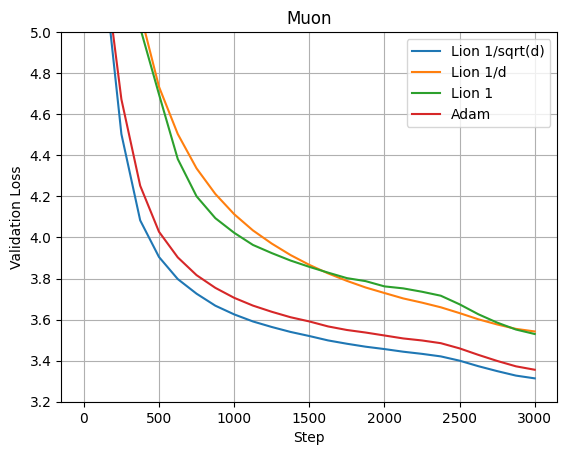

(dion+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv_sqrt - val/loss
(dion+lion)_bs=1024_lr=0.01_sp=1.0_scale_inv - val/loss
(dion+lion)_bs=1024_lr=0.01_sp=1.0_scale_none - val/loss
(dion+adam)_bs=1024_lr=0.01_sp=1.0_adam - val/loss


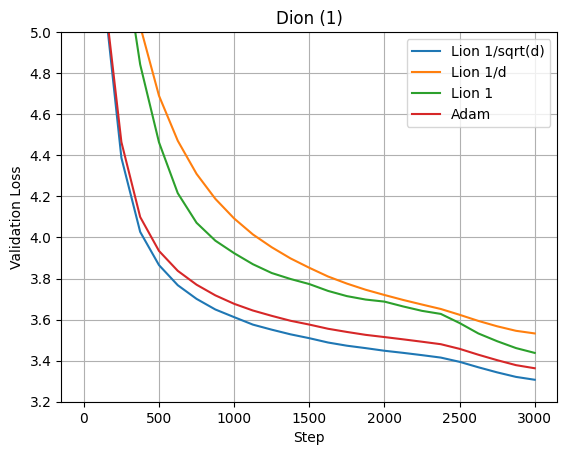

(dion+lion)_bs=1024_lr=0.01_sp=0.25_scale_inv_sqrt - val/loss
(dion+lion)_bs=1024_lr=0.01_sp=0.25_scale_inv - val/loss
(dion+lion)_bs=1024_lr=0.01_sp=0.25_scale_none - val/loss
(dion+adam)_bs=1024_lr=0.01_sp=0.25_adam - val/loss


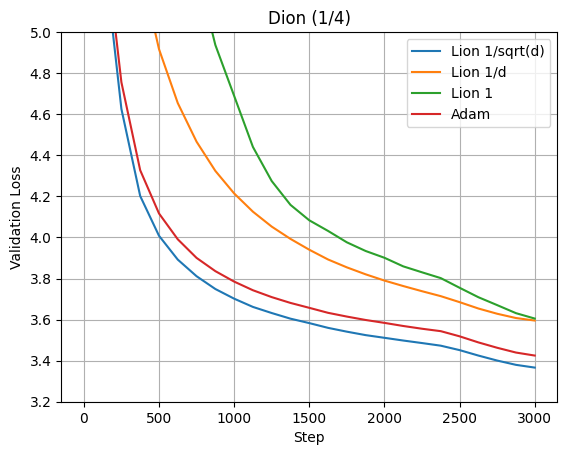

(dion+lion)_bs=1024_lr=0.01_sp=0.0625_scale_inv_sqrt - val/loss
(dion+lion)_bs=1024_lr=0.01_sp=0.0625_scale_inv - val/loss
(dion+lion)_bs=1024_lr=0.01_sp=0.0625_scale_none - val/loss
(dion+adam)_bs=1024_lr=0.01_sp=0.0625_adam - val/loss


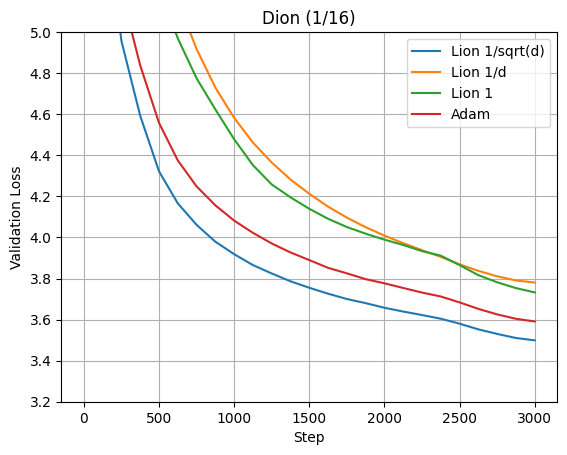

In [30]:
for optimizer, sparsity in [
    ("muon", 1),
    ("dion", 1 / 1),
    ("dion", 1 / 4),
    ("dion", 1 / 16),
]:
    for scale_factor, plot_name in [
        ("scale_inv_sqrt", "Lion 1/sqrt(d)"),
        ("scale_inv", "Lion 1/d"),
        ("scale_none", "Lion 1"),
        ("adam", "Adam"),
    ]:
        col_name = get_column_by_name(
            data, optimizer, scaling=scale_factor, sparsity=sparsity
        )
        print(col_name)
        # data[col_name] = data[col_name].replace(0, np.nan)
        plt.plot(data["step"], data[col_name], label=plot_name)

    plt.ylim(3.2, 5)
    plt.xlabel("Step")
    plt.ylabel("Validation Loss")
    if optimizer == "muon":
        plt.title("Muon")
    elif sparsity == 1:
        plt.title(f"Dion (1)")
    else:
        plt.title(f"Dion (1/{int(1/sparsity)})")
    plt.legend()
    plt.grid()
    plt.savefig(f"scalar_opt_{optimizer}_{int(1/sparsity)}.pdf")
    plt.show()